In [71]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/M1_S2/ML/ProjetML/src
from mltools import *
from loss import *
from module import *
from encapsulage import *
from sklearn.metrics import ConfusionMatrixDisplay

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/M1_S2/ML/ProjetML/src


In [67]:
X,Y = load('../data/usps_train.txt')
Xt,Yt = load('../data/usps_test.txt')
Y = Y.astype(int)
Y_onehot = np.zeros((Y.size,10));
Y_onehot[np.arange(Y.size),Y]=1
#X_ = X.reshape(X.shape[0], X.shape[1], 1)
X_ = X[:,:,np.newaxis]
data = np.array([np.array([x,y]).tolist() for x, y in zip(X_,Y_onehot)])

<ipython-input-67-4f6532b6802f>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([np.array([x,y]).tolist() for x, y in zip(X_,Y_onehot)])


100%|██████████| 25/25 [02:52<00:00,  6.89s/it]


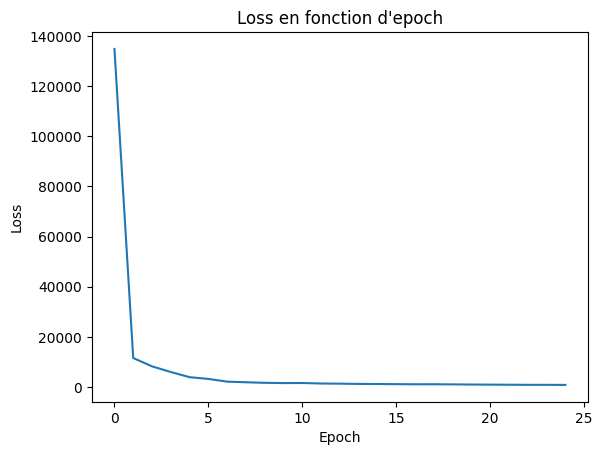

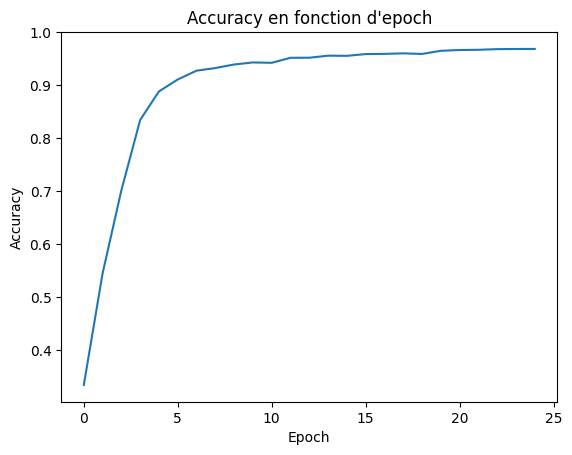

In [68]:
np.random.seed(6)

net = Sequentiel(
    Conv1D(3, 1, 32),
    MaxPool1D(2, 2),
    Flatten(),
    Linear(4064, 100, mode=1), #xavier uni
    ReLU(),
    Linear(100, 10,mode=1), #xavier uni
)

#SGD
nb_epoch = 25
l,s = SGD(net, data, SMCELoss(), eps=1e-4, batch_taille=1000, nb_iter=nb_epoch)
#loss
plt.plot(np.arange(nb_epoch),l)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss en fonction d'epoch")
plt.show()
# accuracy
plt.plot(np.arange(nb_epoch),s)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction d'epoch")
plt.show()

In [70]:
Yt = Yt.astype(int)
Yt_onehot = np.zeros((Yt.size,10));
Yt_onehot[np.arange(Yt.size),Yt]=1
Xt_ = Xt[:,:,np.newaxis]

print("Score sur data train:", Optim(net, SMCELoss(),eps=1e-4).score(X_, Y_onehot))
print("Score sur data test:", Optim(net, SMCELoss(),eps=1e-4).score(Xt_, Yt_onehot))

Score sur data train: 0.9687285694692086
Score sur data test: 0.918784255107125


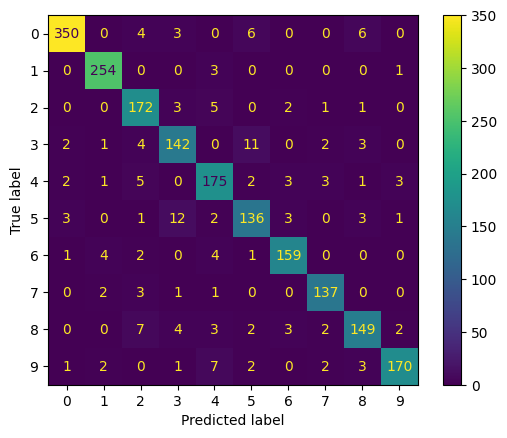

In [73]:
y_test_pred = np.argmax(net.forward(Xt_), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_test_pred, Yt)